In [1]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
from pathos.multiprocessing import ProcessPool
import errno
import dill
import sys
sys.path.append('../')

import neat
from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net

import itertools as it
import time
import imageio

import sgr_main as sgr
from matplotlib import pyplot as plt


from substrates import morph_substrate, control_substrate
from generate_robot import generate_robot
from evogym_sim import simulate_env
from body_speciation import new_distance


In [2]:
def get_robot(genome, params, neat_config):
    cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)

    design_substrate = morph_substrate(params)
    design_net = create_phenotype_network(cppn, design_substrate)

    robot = generate_robot(design_net, params)
    if not sgr.eval_genome_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)
    env = evogym.envs.gym.make(params["env"], body=robot, connections=connections)
    img = env.render(mode='img')
    env.close()
    return robot, img

In [3]:
ENV = "ObstacleTraverser-v1" # env_names = ["CaveCrawler-v0", "UpStepper-v0", "ObstacleTraverser-v1"]
STEPS = 600
ROBOT_SIZE = 5
POP = 128

directory = "results/" + ENV

file = "run_2_pop.pkl"
defaultGen = neat.DefaultGenome
f = lambda self, other, config: new_distance(params, morph_substrate(params), generate_robot, self, other, config)
# defaultGen.distance = f
params = {"robot_size": ROBOT_SIZE, "env": ENV, "steps": STEPS, "pop_size": POP, "robot_substrate": "AA"}
neat_config = neat.config.Config(
    defaultGen,
    neat.reproduction.DefaultReproduction, 
    neat.species.DefaultSpeciesSet, 
    neat.stagnation.DefaultStagnation, 
    "../configs/hyperNEAT_CPPN_robot.cfg"
)

with open(f"../{directory}/{file}", "rb") as file:
    pop = dill.load(file)
champion = pop.best_genome
print(champion.fitness)

7.576332365784299


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  36 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  49 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
14471 1.005985671761046


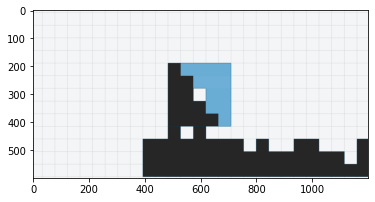

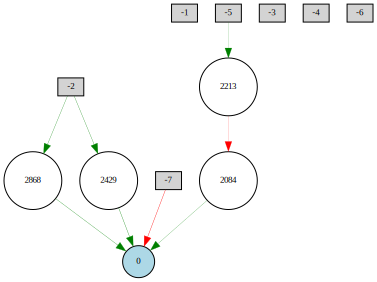

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  50 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
14031 1.089961503106512


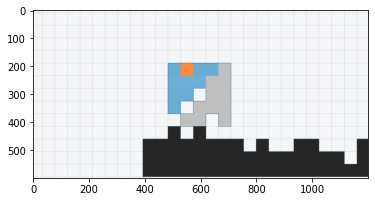

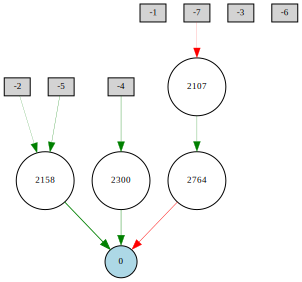

14131 1.0865948007528532


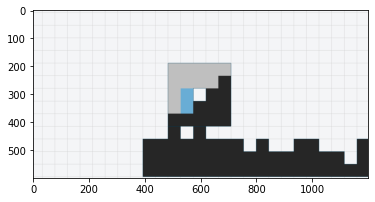

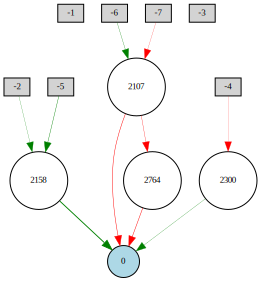

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  51 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
13525 1.0984137423708507


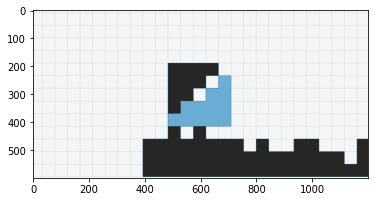

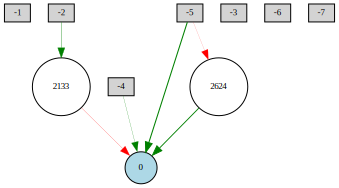

13343 1.09674419064633


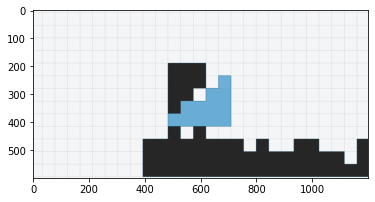

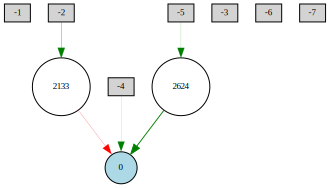

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  46 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
12892 1.114570356174908


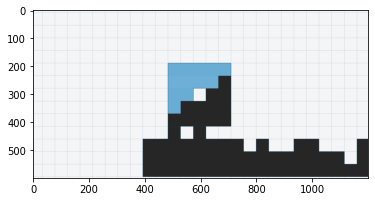

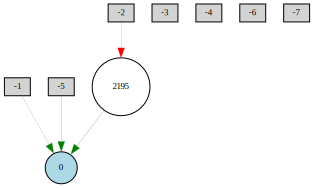

13383 1.114570356174908


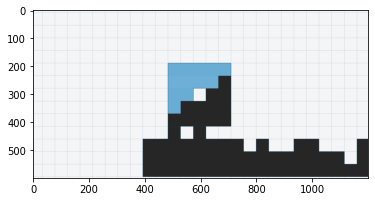

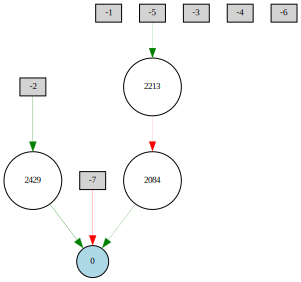

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  54 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
13427 1.1199163719879612


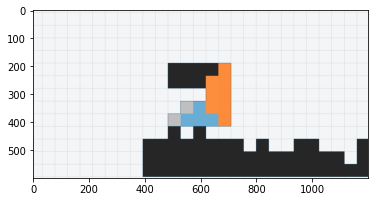

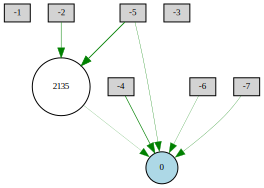

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  55 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
14488 1.0897206216204383


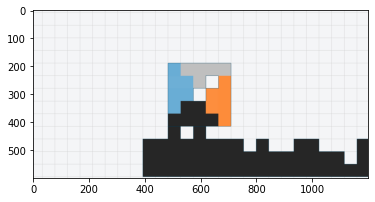

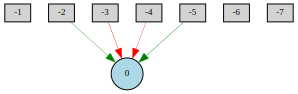

14261 1.119603657827832


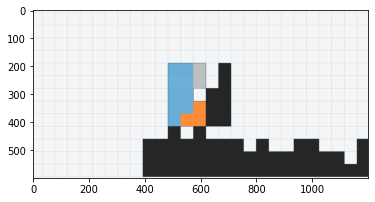

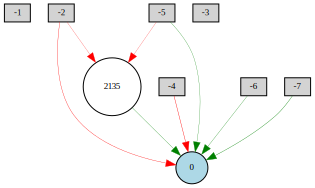

14264 1.164973532073758


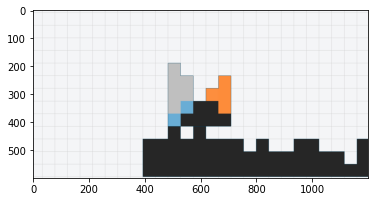

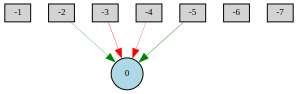

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  57 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
14259 1.322086161421577


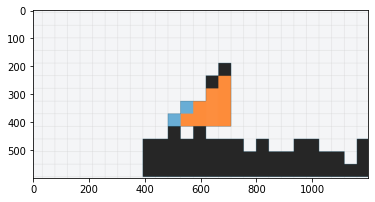

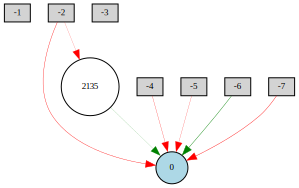

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  39 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
12948 1.7420753998642604


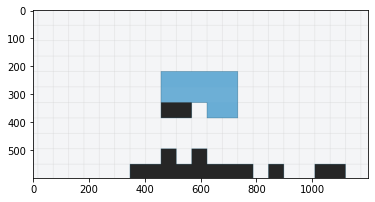

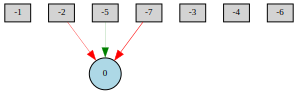

14499 1.1049118437397178


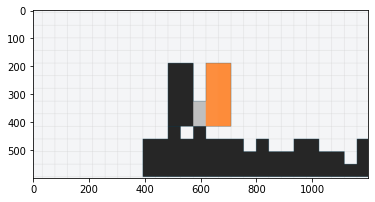

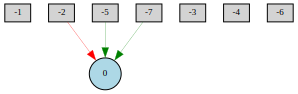

14501 1.0505555172729792


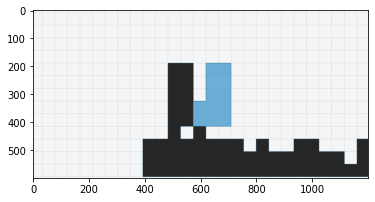

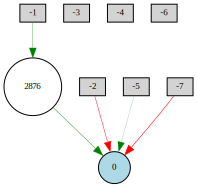

13480 1.1047991476505286


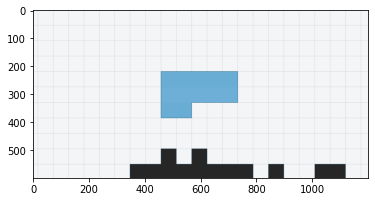

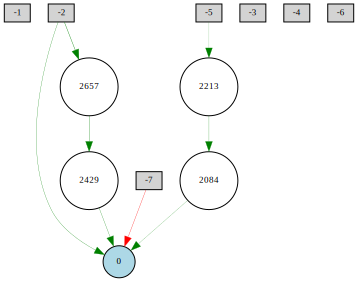

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  56 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
14515 4.477163068219437


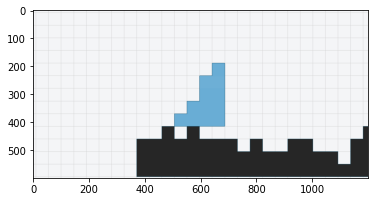

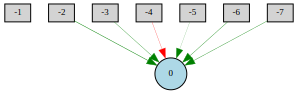

13041 3.1977119294050858


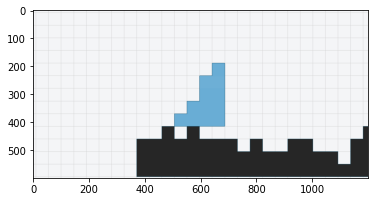

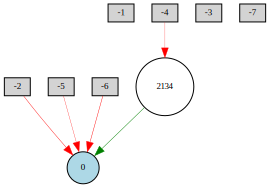

14331 2.261623183085743


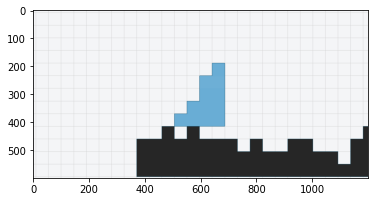

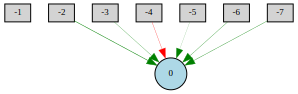

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  47 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
14520 3.4044938503712827


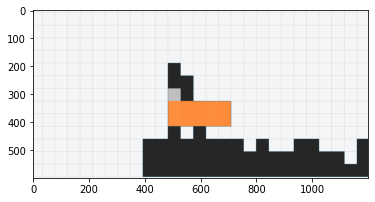

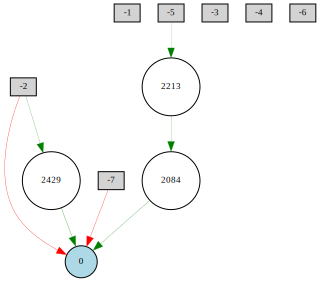

12728 4.016081894031246


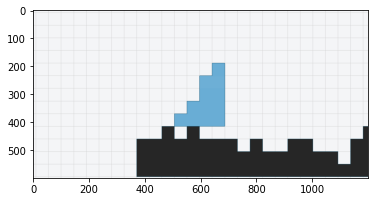

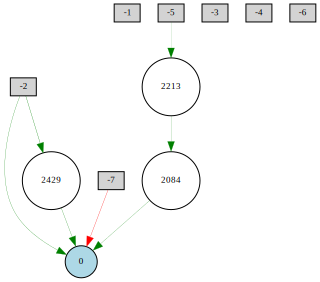

14314 4.525608970256656


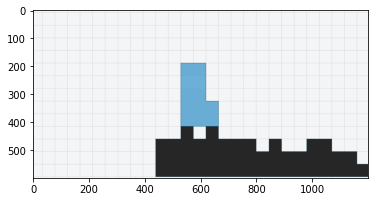

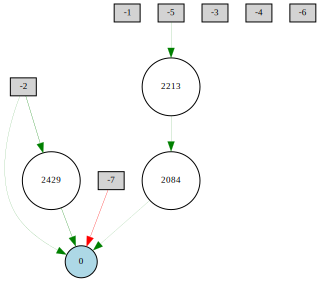

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie  1 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
913 7.564591592781537


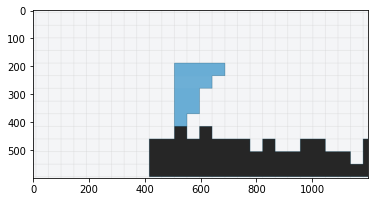

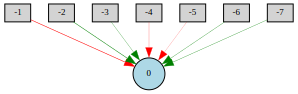

14528 4.617845789175846


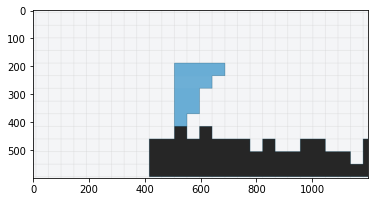

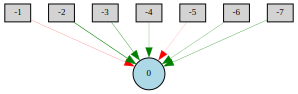

14532 2.4572986145194418


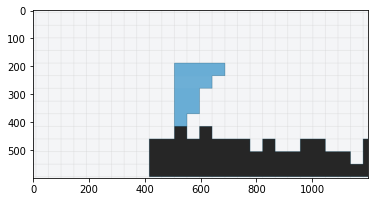

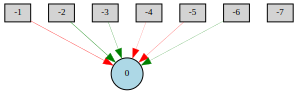

14533 5.242975335910502


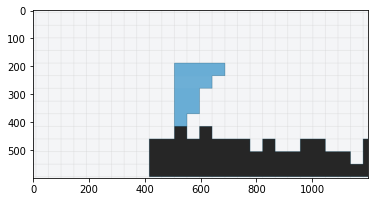

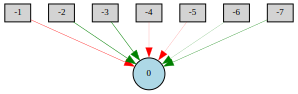

14538 5.1222260932381225


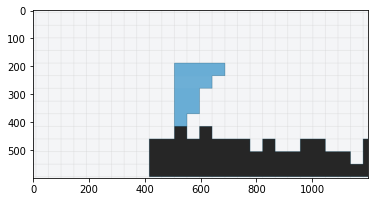

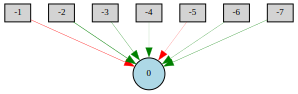

14540 4.9087266962135985


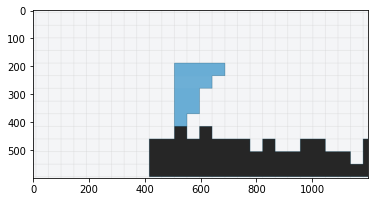

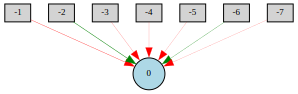

4530 7.576332365784299


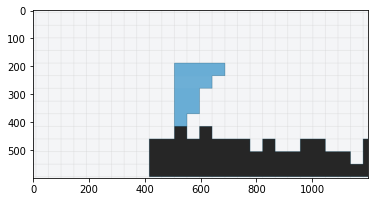

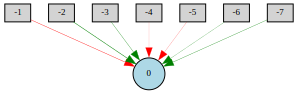

In [ ]:
for k, v in pop.species.species.items():
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Specie ", k, "!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    for g in v.members.values():
        if g.fitness != None and g.fitness > 1:
            r, img = get_robot(g, params, neat_config)
            if img is not None:
                print(g.key, g.fitness)
                plt.imshow(img)
                plt.show()
                net = neat.nn.FeedForwardNetwork.create(g, neat_config)
                display(draw_net(net))

In [6]:
# g = champion
g = pop.population[14499]
params["save_to"] = "flipper_bipedal"
sgr.single_genome_fit(g, params, neat_config, True, False)
# sgr.single_genome_fit(g, params, neat_config, False, True)

(1.1028234722298895, False)

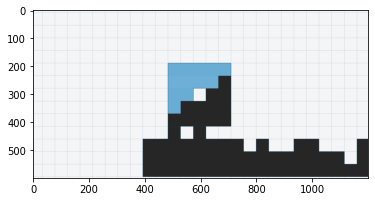

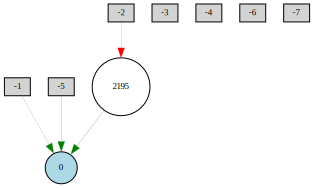

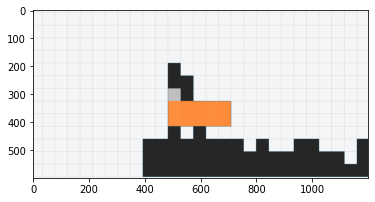

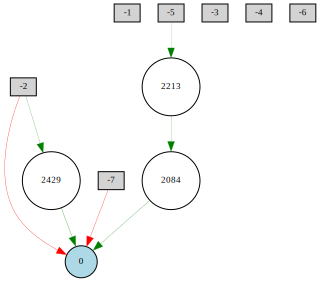

4.716327532073551

2.7363275320735507


In [8]:
base = pop.population[12892]
r2 = pop.population[14520]

_, img = get_robot(base, params, neat_config)
plt.imshow(img)
plt.show()
net = neat.nn.FeedForwardNetwork.create(base, neat_config)
display(draw_net(net))

_, img = get_robot(r2, params, neat_config)
plt.imshow(img)
plt.show()
net = neat.nn.FeedForwardNetwork.create(r2, neat_config)
display(draw_net(net))


neat_config.compatibility_disjoint_coefficient = 1
neat_config.compatibility_weight_coefficient = .6

base.distance = f
print(base.distance(base, r2, neat_config))


print()

base.distance =  neat.DefaultGenome.distance
print(base.distance(base, r2, neat_config))
